In [152]:
# Importing necessary libraries 

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Metrics and preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score

import tensorflow as tf
import math

# TF and Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers


from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

# PART A 

# Question 1. Data import andUnderstanding [10Marks]
#    A. Read the ‘Signals.csv’ asDataFrame and importrequired libraries.[2Marks]
#    B. Check for missing values and print percentage for each attribute. [2 Marks]
#    C. Check for presence of duplicate recordsin the dataset and impute with appropriate method. [2 Marks]
#    D. Visualise distribution of the target variable. [2 Marks]
#    E. Share insightsfrom the initial data analysis(at least 2). [2 Marks]

In [2]:
# A. Read the ‘Signals.csv’ asDataFrame and import required libraries.[2Marks]


signal = pd.read_csv("Signals.csv")
print("Data shape:",signal.shape)
signal.head()

Data shape: (1599, 12)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
signal.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# B. Check for missing values and print percentage for each attribute. [2 Marks]

df=signal.isna().sum().round(2)
df1 = (df*100/signal.shape[0]).round(2)
print('Missing count and percentages for each column are: \n',df.astype('str') +' ('+ df1.astype('str')+'%)')

Missing count and percentages for each column are: 
 Parameter 1        0 (0.0%)
Parameter 2        0 (0.0%)
Parameter 3        0 (0.0%)
Parameter 4        0 (0.0%)
Parameter 5        0 (0.0%)
Parameter 6        0 (0.0%)
Parameter 7        0 (0.0%)
Parameter 8        0 (0.0%)
Parameter 9        0 (0.0%)
Parameter 10       0 (0.0%)
Parameter 11       0 (0.0%)
Signal_Strength    0 (0.0%)
dtype: object


From above result there are no missing values so no need to drop missing values and even no need to fill it with median.

In [6]:
# C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]

# i) First checking duplicate rows

signal.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

From above results we realize that there are some duplicate rocords exits so removing duplicates

In [7]:
signal1 = signal.drop_duplicates()
signal1.shape
signal1.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


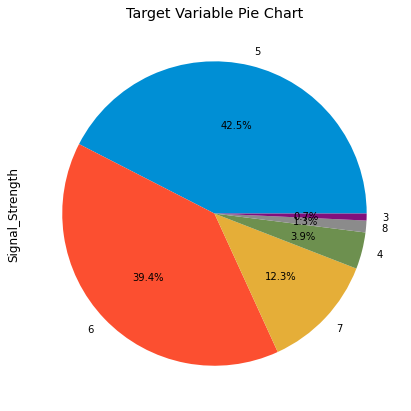

In [8]:
# D. Visualise distribution of the target variable. [2 Marks]

#Distribution of Target Variable.

f,axes=plt.subplots(1,1,figsize=(17,7))
signal1['Signal_Strength'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('Target Variable Pie Chart')
plt.show()

It is evident that there is balance in the dataset.

Only 39.9% represents the 6 category and 42.6% represents 5 category ,12.4% represents 7  category.

# E. Share insightsfrom the initial data analysis(at least 2). [2 Marks]

i) All datatypes of attributes parameter 1 to paramete 11 are float and only signal_strength attribute is int. 
ii) There are no missing values in data iii) 5 point summary is as followes :

In [9]:
signal1.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


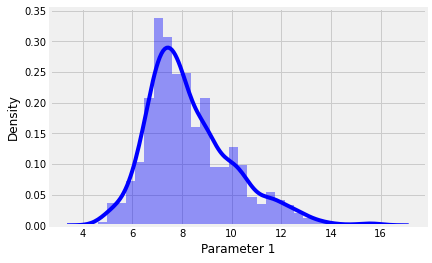

Distribution of  Parameter 1
Mean is: 8.310596026490067
Median is: 7.9
Mode is: 0    7.2
Name: Parameter 1, dtype: float64
Standard deviation is: 1.7369898075324683
Skewness is: 0.9410413664561449
Maximum is: 15.9
Minimum is: 4.6


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


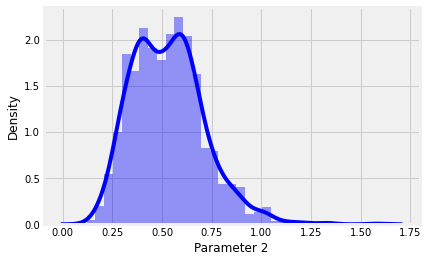

Distribution of  Parameter 2
Mean is: 0.5294775570272259
Median is: 0.52
Mode is: 0    0.5
Name: Parameter 2, dtype: float64
Standard deviation is: 0.1830313176190719
Skewness is: 0.7292789463991854
Maximum is: 1.58
Minimum is: 0.12


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


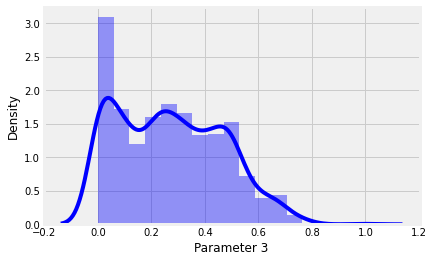

Distribution of  Parameter 3
Mean is: 0.2723325974981604
Median is: 0.26
Mode is: 0    0.0
Name: Parameter 3, dtype: float64
Standard deviation is: 0.1955365445504638
Skewness is: 0.31272554238899036
Maximum is: 1.0
Minimum is: 0.0


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


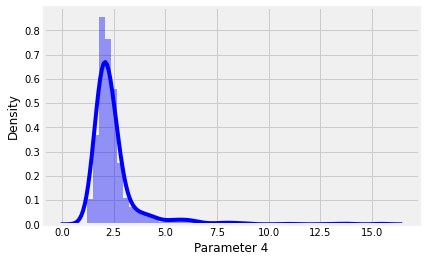

Distribution of  Parameter 4
Mean is: 2.5233995584988964
Median is: 2.2
Mode is: 0    2.0
Name: Parameter 4, dtype: float64
Standard deviation is: 1.3523137577104225
Skewness is: 4.548153403940447
Maximum is: 15.5
Minimum is: 0.9


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


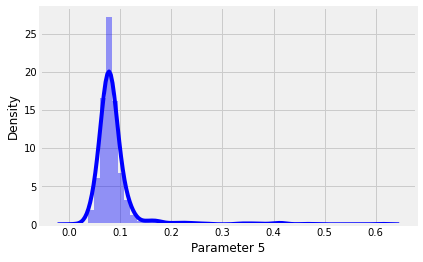

Distribution of  Parameter 5
Mean is: 0.08812362030905077
Median is: 0.079
Mode is: 0    0.08
Name: Parameter 5, dtype: float64
Standard deviation is: 0.04937686244348607
Skewness is: 5.502487294623722
Maximum is: 0.611
Minimum is: 0.012


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


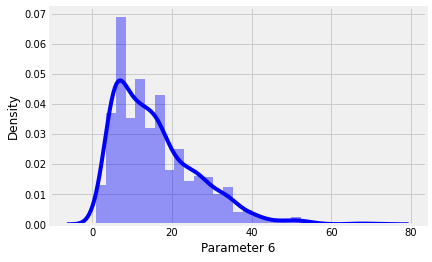

Distribution of  Parameter 6
Mean is: 15.893303899926417
Median is: 14.0
Mode is: 0    6.0
Name: Parameter 6, dtype: float64
Standard deviation is: 10.447270259048693
Skewness is: 1.2265794991760643
Maximum is: 72.0
Minimum is: 1.0


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


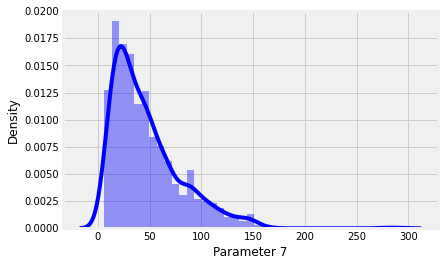

Distribution of  Parameter 7
Mean is: 46.82597498160412
Median is: 38.0
Mode is: 0    28.0
Name: Parameter 7, dtype: float64
Standard deviation is: 33.40894570661652
Skewness is: 1.5403680777213933
Maximum is: 289.0
Minimum is: 6.0


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


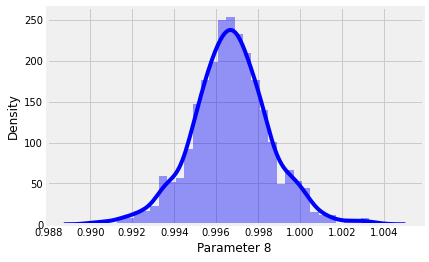

Distribution of  Parameter 8
Mean is: 0.9967089477557026
Median is: 0.9967
Mode is: 0    0.9968
Name: Parameter 8, dtype: float64
Standard deviation is: 0.0018689171325591413
Skewness is: 0.04477785573116107
Maximum is: 1.00369
Minimum is: 0.99007


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


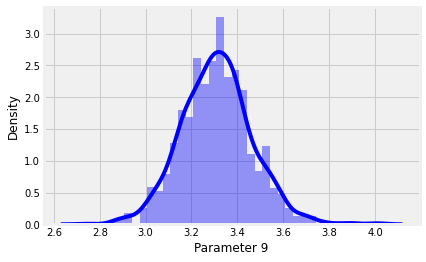

Distribution of  Parameter 9
Mean is: 3.309786607799853
Median is: 3.31
Mode is: 0    3.3
Name: Parameter 9, dtype: float64
Standard deviation is: 0.15503631128729617
Skewness is: 0.2320322752014824
Maximum is: 4.01
Minimum is: 2.74


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


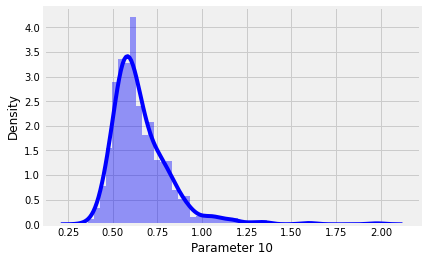

Distribution of  Parameter 10
Mean is: 0.6587049300956587
Median is: 0.62
Mode is: 0    0.54
Name: Parameter 10, dtype: float64
Standard deviation is: 0.17066689057420686
Skewness is: 2.4065046145674196
Maximum is: 2.0
Minimum is: 0.33


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


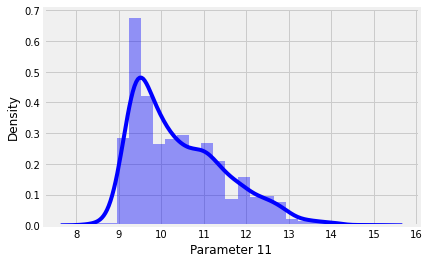

Distribution of  Parameter 11
Mean is: 10.432315428013245
Median is: 10.2
Mode is: 0    9.5
Name: Parameter 11, dtype: float64
Standard deviation is: 1.082065449949784
Skewness is: 0.8598411692319623
Maximum is: 14.9
Minimum is: 8.4


C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


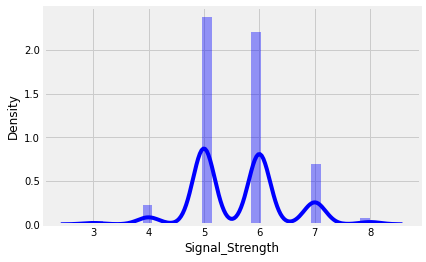

Distribution of  Signal_Strength
Mean is: 5.6232523914643116
Median is: 6.0
Mode is: 0    5
Name: Signal_Strength, dtype: int64
Standard deviation is: 0.8235780017165553
Skewness is: 0.19240658731658308
Maximum is: 8
Minimum is: 3


In [10]:
# studying the distribution of continuous attributes

cols = list(signal1)
for i in np.arange(len(cols)):
    sns.distplot(signal1[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',signal1[cols[i]].mean())
    print('Median is:',signal1[cols[i]].median())
    print('Mode is:',signal1[cols[i]].mode())
    print('Standard deviation is:',signal1[cols[i]].std())
    print('Skewness is:',signal1[cols[i]].skew())
    print('Maximum is:',signal1[cols[i]].max())
    print('Minimum is:',signal1[cols[i]].min())

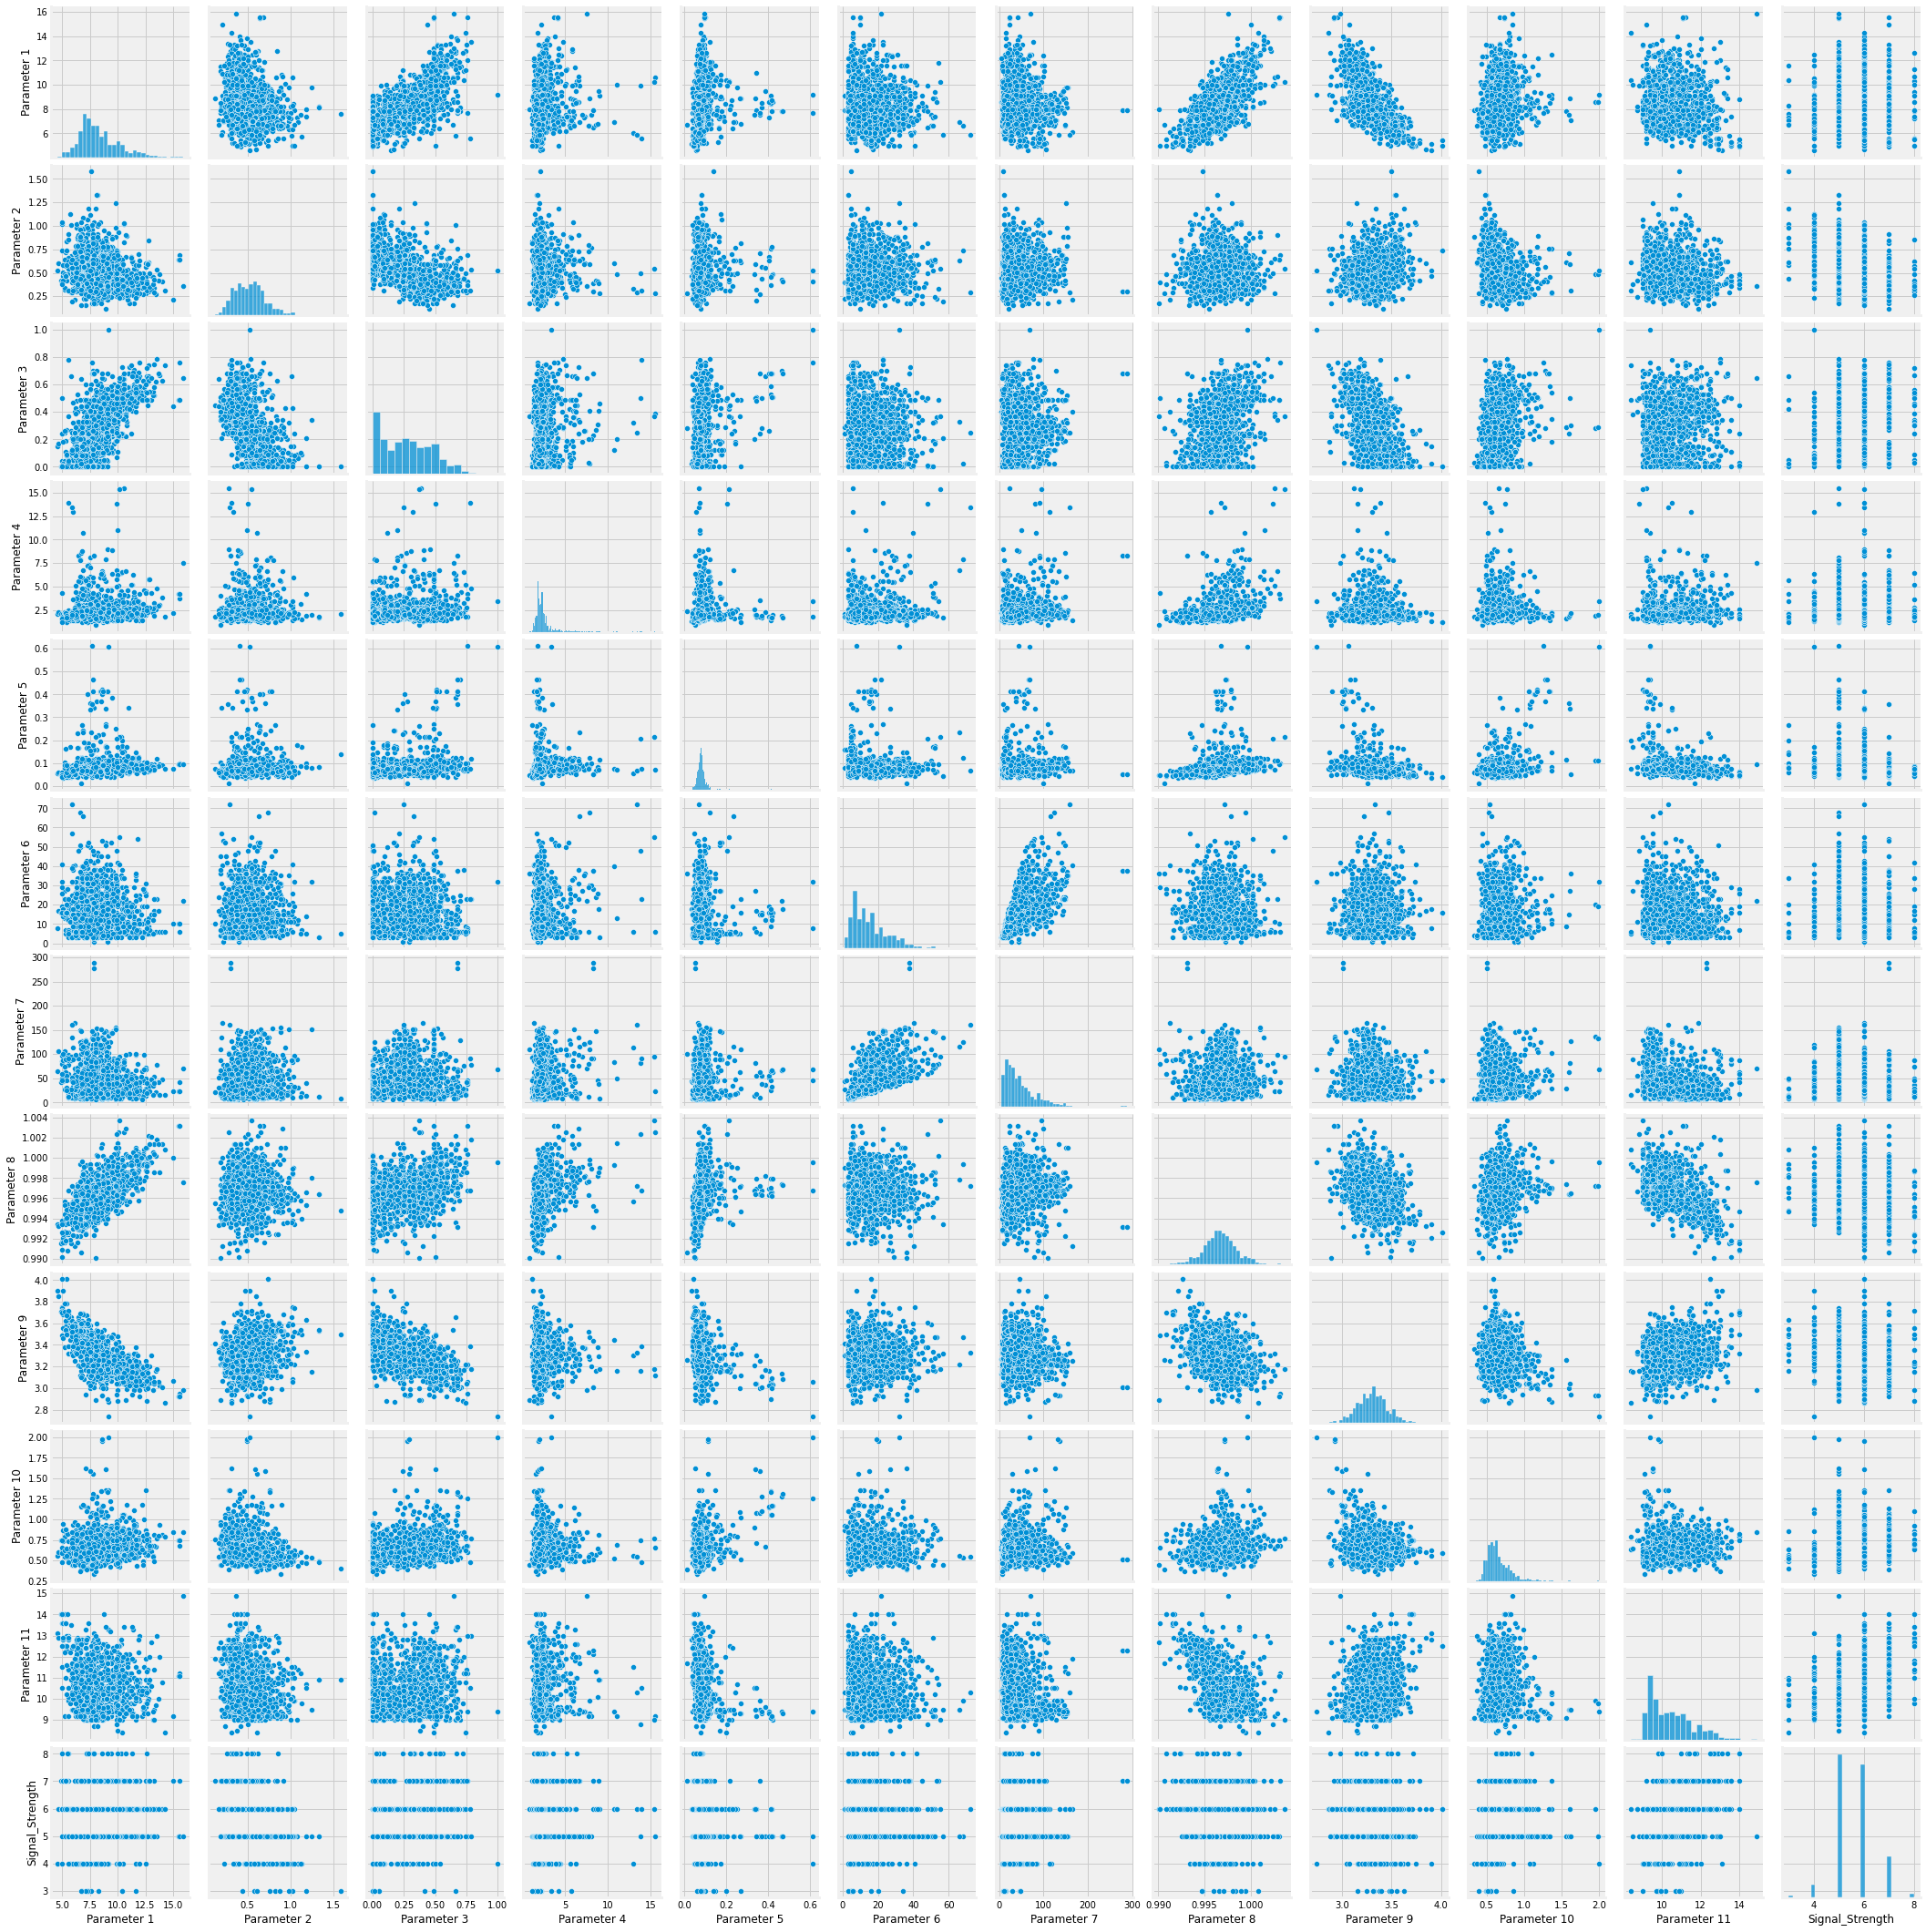

In [11]:
sns.pairplot(signal1)

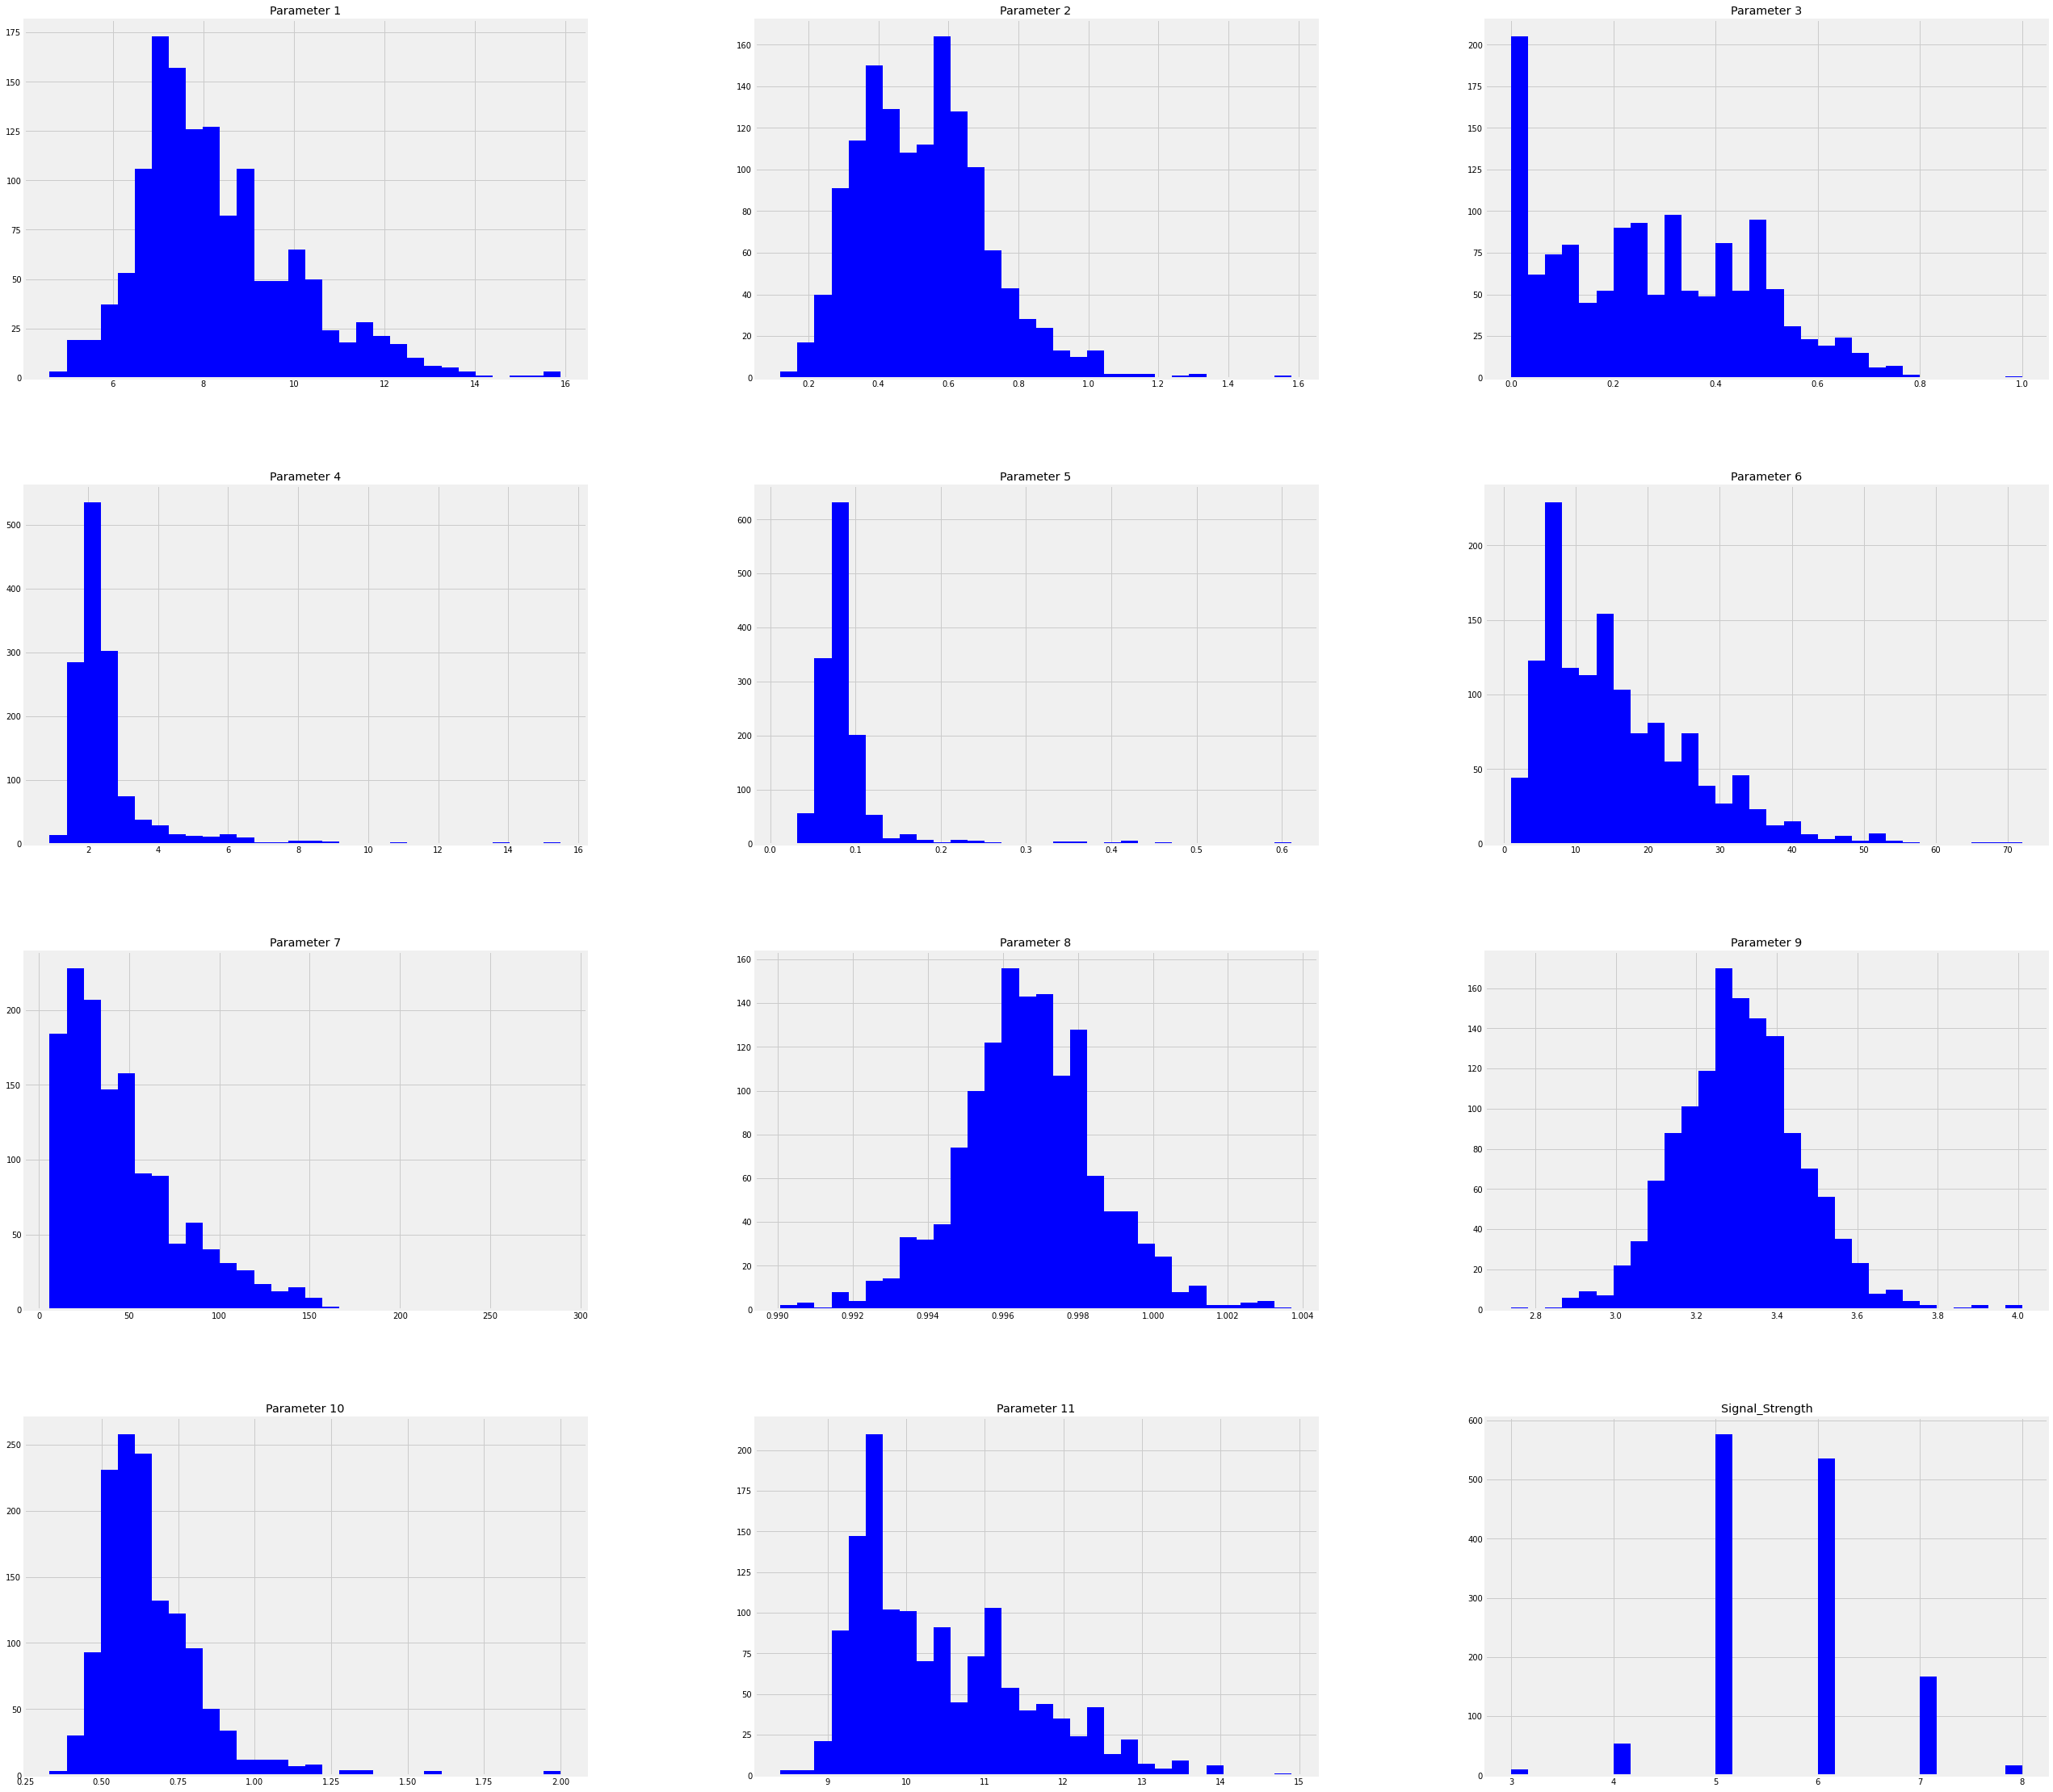

In [12]:
#plotting histogram to check for the frequency of values within a variable

signal1.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

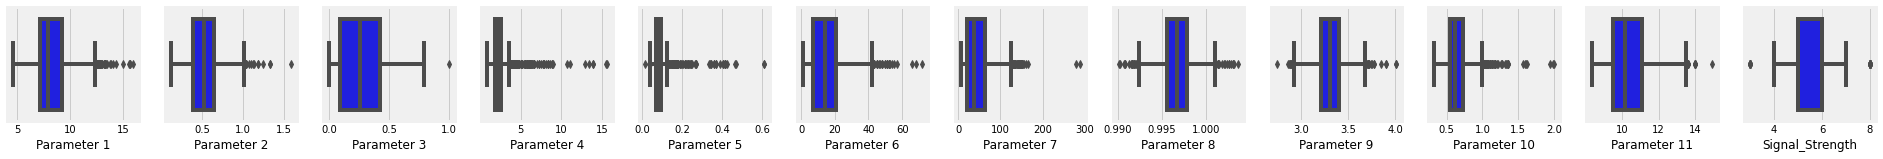

In [31]:
#Boxplot 
plt.figure(figsize=(50, 50))
col = 1
for i in signal1.columns:
    plt.subplot(20,20, col)
    sns.boxplot(signal1[i],color='blue')
    col += 1

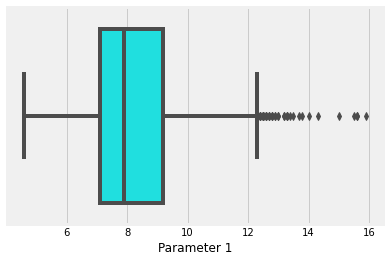

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1359  rows in data, number of outliers are: 41


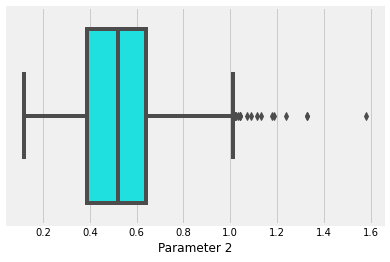

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1359  rows in data, number of outliers are: 19


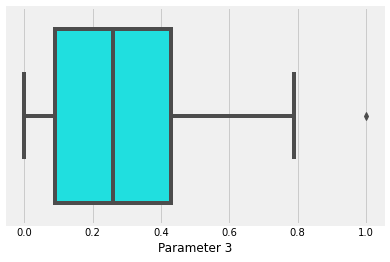

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33999999999999997
Lower Whisker, Upper Whisker :  -0.42000000000000004 , 0.94
Out of  1359  rows in data, number of outliers are: 1


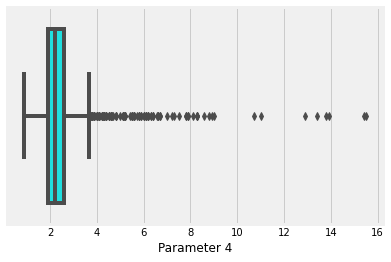

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1359  rows in data, number of outliers are: 126


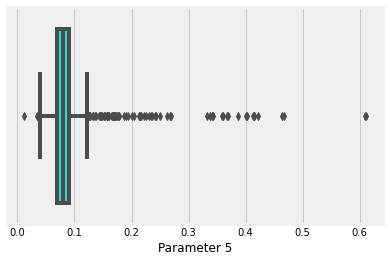

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.02099999999999999
Lower Whisker, Upper Whisker :  0.03850000000000002 , 0.12249999999999998
Out of  1359  rows in data, number of outliers are: 87


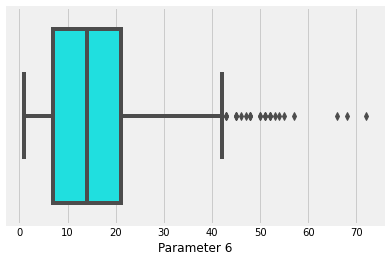

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1359  rows in data, number of outliers are: 26


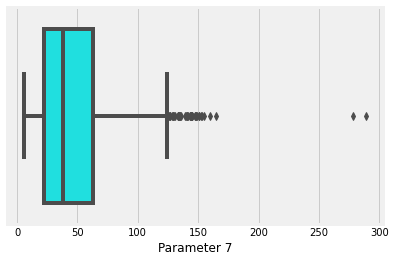

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Out of  1359  rows in data, number of outliers are: 45


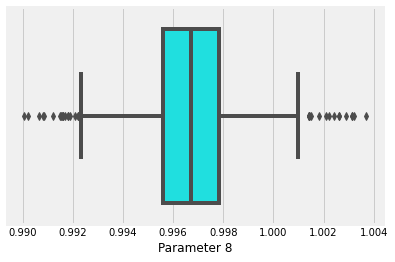

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.9967
Q3 is :  0.99782
IQR is: 0.0022199999999999998
Lower Whisker, Upper Whisker :  0.99227 , 1.00115
Out of  1359  rows in data, number of outliers are: 35


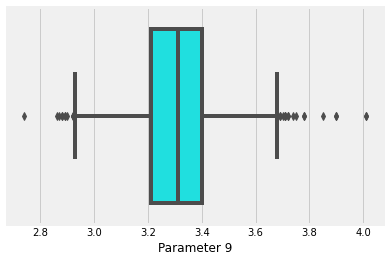

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1359  rows in data, number of outliers are: 28


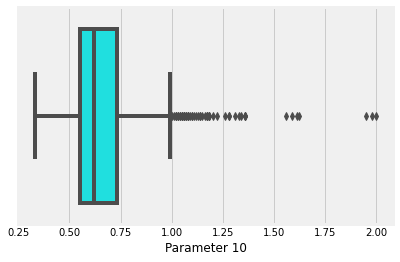

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1359  rows in data, number of outliers are: 55


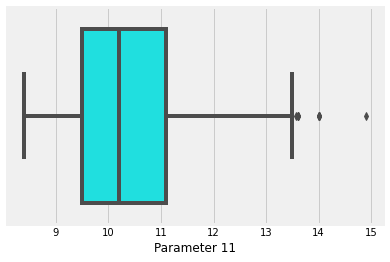

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1359  rows in data, number of outliers are: 12


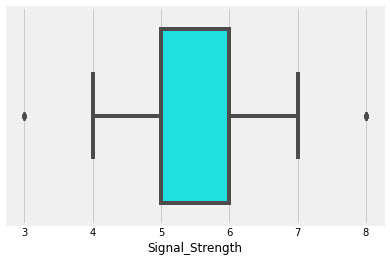

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1359  rows in data, number of outliers are: 27


In [33]:
# Checking the presence of outliers
l = len(signal1)
col = list(signal1.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= signal1[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = signal1[col[i]].quantile(0.25)
    Q2 = signal1[col[i]].quantile(0.50)
    Q3 = signal1[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (signal1[col[i]] < (Q1 - 1.5 *IQR)) |(signal1[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

Parameter 4 has the highest number of outliers which is 155.

In [38]:
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR) 
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [39]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(signal1,'update')
if count>0:
    print('Updating dataset')
    signal1=df

Updating dataset


C:\Users\sagar\AppData\Local\Temp\ipykernel_6252\1174831661.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[col] > upper_boundary,col] = upper_boundary


<AxesSubplot:>

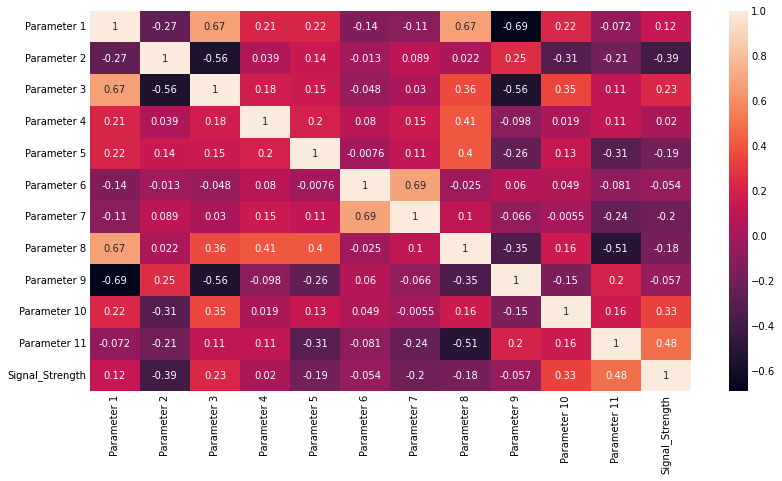

In [40]:
# studying correlation between the attributes
b_corr=signal1.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True)

Since high correlation coefficient value lies between ± 0.50 and ± 1 Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9. Parameter 6 and 7 are highly correlated. But since, the correlation is not too high near 0.8 or above not dropping the features.

# Question 2 Data preprocessing [7Marks]
#   A. Split the data into X & Y.[1 Marks]
#   B. Split the data into train & test with 70:30 proportion.[1 Marks]
#   C. Printshape of all the 4 variables and verify if train and test data is in sync. [1 Marks]
#   D. Normalise the train and test data with appropriate method. [2 Marks]
#   E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [41]:
# A. Split the data into X & Y.[1 Marks]

#  separating  the independent and dependent variables
X = signal1.drop(labels= "Signal_Strength" , axis = 1)
y = signal1["Signal_Strength"]
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [45]:
# B. Split the data into train & test with 70:30 proportion.[1 Marks]

# splitting to create test data

X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [82]:
# C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

print("Printing shape of train first : ")
print(X_vtrain.shape, y_vtrain.shape)

print("Printing shape of test first : ")
print(X_test.shape, y_test.shape)

Printing shape of train first : 
(951, 11) (951,)
Printing shape of test first : 
(408, 11) (408,)


From above result it is proved that both train and test are in sync.

In [84]:
# D. Normalise the train and test data with appropriate method. [2 Marks]

normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_train_X

normalized_test_X = normalizer.transform(X_test)
normalized_test_X

array([[4.67493826e-01, 1.65275595e-02, 2.59718792e-02, ...,
        1.53942411e-01, 3.73050628e-02, 5.00548944e-01],
       [2.37615933e-01, 2.56451342e-02, 5.79551055e-03, ...,
        9.01201890e-02, 1.33296743e-02, 2.89775527e-01],
       [2.57478204e-01, 6.74942864e-03, 5.99949212e-03, ...,
        8.04931860e-02, 1.64986033e-02, 3.19972913e-01],
       ...,
       [9.72553343e-02, 5.14881182e-03, 3.52788958e-03, ...,
        3.03207807e-02, 7.34182426e-03, 8.58135303e-02],
       [7.25547328e-02, 6.02919610e-03, 2.04379529e-04, ...,
        3.62773664e-02, 5.41605752e-03, 9.91240715e-02],
       [1.73845850e-01, 1.15114144e-02, 4.46360965e-03, ...,
        7.91703396e-02, 1.19812680e-02, 2.46673165e-01]])

In [85]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=1)

In [114]:
X_train.shape

(760, 11)

# Question 3 ModelTraining & EvaluationusingNeuralNetwork[13Marks]
#   A. Design a Neural Network to train a classifier.[3Marks]

In [87]:
# Initialize Sequential model
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))

In [88]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')

In [89]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
76/76 [==============================] - 1s 3ms/step - loss: 4.5742 - val_loss: 8.4169
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 0.9129 - val_loss: 2.9510
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.6659 - val_loss: 1.3054
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.5869 - val_loss: 0.5658
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.5255 - val_loss: 0.4855
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.5029 - val_loss: 0.4304
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4486 - val_loss: 0.3877
Epoch 8/100
76/76 [==============================] - 0s 1ms/step - loss: 0.4725 - val_loss: 0.3762
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4515 - val_loss: 0.3852
Epoch 10/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4616 - val_loss: 0.3774
Epoch 11/

76/76 [==============================] - 0s 2ms/step - loss: 0.4334 - val_loss: 0.3635
Epoch 84/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4342 - val_loss: 0.3415
Epoch 85/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4133 - val_loss: 0.3443
Epoch 86/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4161 - val_loss: 0.3448
Epoch 87/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4344 - val_loss: 0.3722
Epoch 88/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4389 - val_loss: 0.3592
Epoch 89/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4023 - val_loss: 0.3566
Epoch 90/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4249 - val_loss: 0.3700
Epoch 91/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4312 - val_loss: 0.3474
Epoch 92/100
76/76 [==============================] - 0s 2ms/step - loss: 0.4303 - val_loss: 0.3445
Epoch 93/100


In [90]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [91]:
# load the model
model_rr = load_model('model_reg.h5')

In [92]:
y_pred = model_rr.predict(X_test)

In [93]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[6.10103]
[4.910076]
[6.70093]
[6.198617]
[5.5786657]


In [94]:
print(y_test.head())

473     5.0
1376    5.0
533     6.0
200     7.0
268     6.0
Name: Signal_Strength, dtype: float64


The first 5 elements of y_pred and y_test are close.

In [95]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.2497749078181678


In [96]:
#summary of regression model
model_rr.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


# Design, train, tune and test a neural network classifier.

In [97]:
# counting the number of classes in output
signal1['Signal_Strength'].value_counts()

5.0    577
6.0    535
7.0    167
4.0     53
7.5     17
3.5     10
Name: Signal_Strength, dtype: int64

In [98]:
X.shape

(1359, 11)

In [99]:
y.shape

(1359,)

In [100]:
# E. Transform Labels into format acceptable by Neural Network [2 Marks]

yc = to_categorical(y, num_classes=8)

In [101]:
# splitting data for test of categorial 
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=1)

In [102]:
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (951, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [103]:
# splitting data for  train and validation of categorial 
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=1)

In [113]:
print("Shape of y_train:", yc_train.shape)
print("One value of y_train:", yc_train[0])

Shape of y_train: (760, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


# Question 3
#   B. Train the classifier using previously designed Architecture [2 Marks]
#   C. Plot 2 separate visuals. [3Marks]
#       i. Training Loss and ValidationLoss
#      ii. Training Accuracy and ValidationAccuracy
#   D. Design new architecture/update existing architecture in attempt to improve the performance ofthemodel.[2 Marks]
#   E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

In [105]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [106]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 2.1399 - accuracy: 0.3934 - val_loss: 1.5713 - val_accuracy: 0.5340
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 1.5429 - accuracy: 0.4316 - val_loss: 1.4970 - val_accuracy: 0.5340
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 1.4492 - accuracy: 0.4316 - val_loss: 1.4366 - val_accuracy: 0.4450
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 1.3830 - accuracy: 0.4342 - val_loss: 1.3708 - val_accuracy: 0.4346
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 1.3287 - accuracy: 0.4368 - val_loss: 1.3117 - val_accuracy: 0.4241
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2815 - accuracy: 0.4513 - val_loss: 1.2558 - val_accuracy: 0.4346
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2321 - accuracy: 0.4487 - val_loss: 1.2102 - val_accuracy: 0.4503
Epoch 8/100
3

Epoch 59/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1276 - accuracy: 0.4303 - val_loss: 1.1167 - val_accuracy: 0.5079
Epoch 60/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1281 - accuracy: 0.4316 - val_loss: 1.0976 - val_accuracy: 0.5183
Epoch 61/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1235 - accuracy: 0.4500 - val_loss: 1.0910 - val_accuracy: 0.4764
Epoch 62/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1232 - accuracy: 0.4408 - val_loss: 1.0915 - val_accuracy: 0.4555
Epoch 63/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1236 - accuracy: 0.4382 - val_loss: 1.0886 - val_accuracy: 0.4817
Epoch 64/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1265 - accuracy: 0.4382 - val_loss: 1.0903 - val_accuracy: 0.4921
Epoch 65/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1273 - accuracy: 0.4342 - val_loss: 1.0895 - val_accuracy: 0.5183
Epoch 

In [107]:
# save the model
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [167]:
# load the model
model_cl = load_model('model_class.h5')

In [109]:
# C. Evaluate performance of the model with appropriate metrics. [2 Marks]
# calculate score of training data
score = model_cl.evaluate(Xc_train, yc_train, verbose=0)
print(score)

[1.1107679605484009, 0.4749999940395355]


In [110]:
# score of test data
score_t = model_cl.evaluate(Xc_test, yc_test, verbose=0)
print( score_t)

[1.165088415145874, 0.5024510025978088]


In [111]:
#summary of classification model
model_cl.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 8)                 96        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


# E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

In [ ]:
From the above results we can conclude that train and test accuracy are very close to each other so our model is best fit.

# PART B

# Question  1. Data Import and Exploration [5Marks]
#  A. Read the .h5 file and assign to a variable. [2 Marks]
#  B. Print all the keysfrom the .h5 file. [1 Marks]
#  C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [116]:
avhn_file = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')


In [117]:
avhn_file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [118]:
X_train = avhn_file['X_train'][:]
y_train = avhn_file['y_train'][:]

X_test = avhn_file['X_test'][:]
y_test = avhn_file['y_test'][:]

X_val = avhn_file['X_val'][:]
y_val = avhn_file['y_val'][:]

In [119]:
#Exploring the shape of the dataset

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)

X_train: (42000, 32, 32)
y_train: (42000,)
X_test: (18000, 32, 32)
y_test: (18000,)
X_val: (60000, 32, 32)
y_val: (60000,)


In [120]:
def ds_vish(data_set):

    fig = plt.figure(figsize = (10,10))

    rows = 10
    columns = 10
    wid = 10
    hei = 10

    for i in range(1, rows * columns + 1):
        img = data_set[i]
        fig.add_subplot(rows, columns,i)
        plt.imshow(img, cmap = 'gray')
    plt.show()

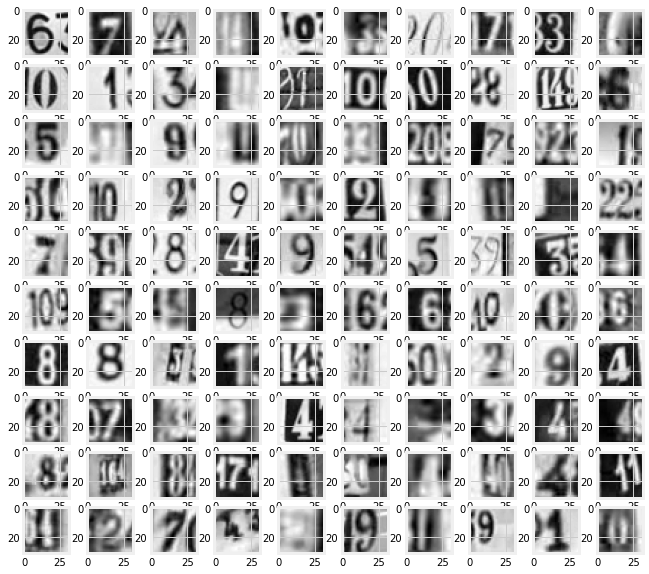

In [121]:
ds_vish(X_train)

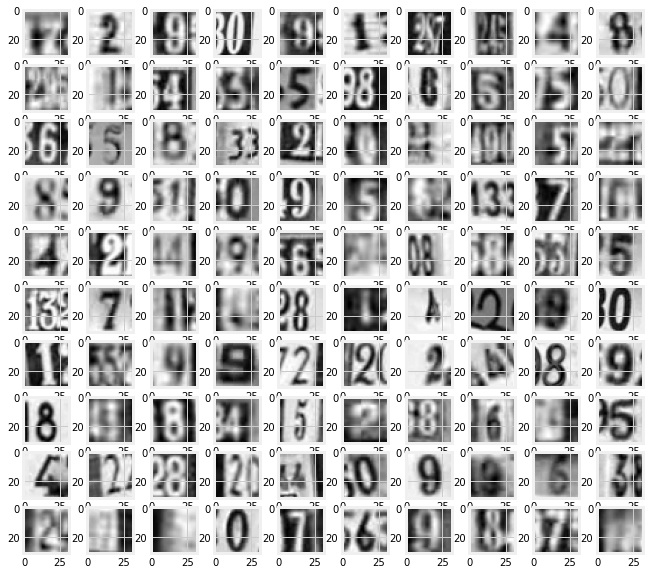

In [122]:
ds_vish(X_test)

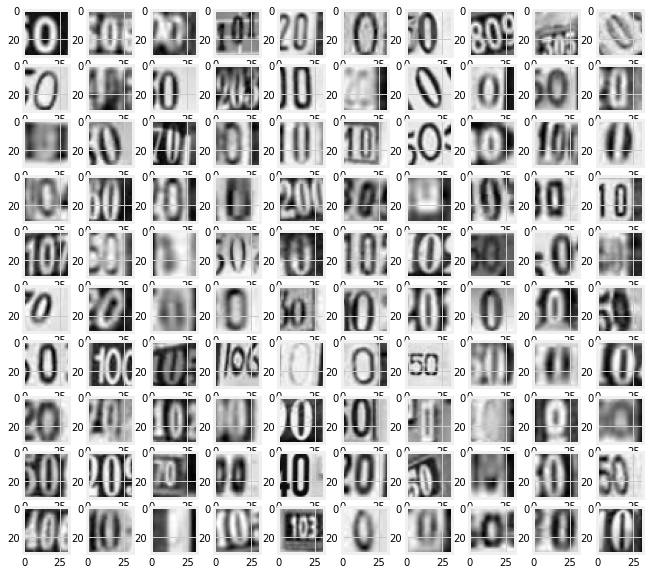

In [123]:
ds_vish(X_val)

Label for the image is 7


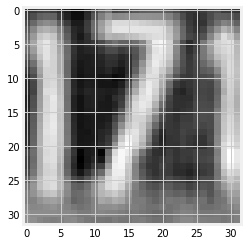

In [124]:
plt.imshow(X_train[8],cmap='gray')
print('Label for the image is', y_train[8])

Label for the image is 4


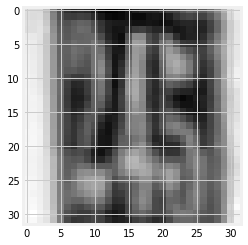

In [125]:
plt.imshow(X_test[8],cmap='gray')
print('Label for the image is', y_test[8])

Label for the image is 0


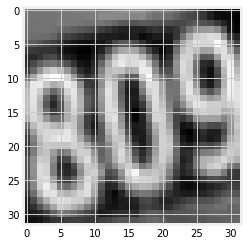

In [126]:
plt.imshow(X_val[8],cmap='gray')
print('Label for the image is', y_val[8])

Observations:

From the above graphs we are able to find the label and its corresponding image
Also the image is not accurate and is blurred and have lot of noises
We are also able to see many number and partial numbers

# Preprocessing before creating the model

In [127]:
    #Reshaping the data for ease of convergence

    X_train = X_train.reshape(X_train.shape[0], 1024)
    X_val= X_val.reshape(X_val.shape[0], 1024)
    X_test = X_test.reshape(X_test.shape[0], 1024)

In [128]:
print('X_train:', X_train.shape)
print('y_train:', X_test.shape)
print('X_test:', X_val.shape)

X_train: (42000, 1024)
y_train: (18000, 1024)
X_test: (60000, 1024)


In [129]:
#Converting the output variable into categorical variable
print('Value before one hot encode', y_train[0])

Value before one hot encode 2


In [131]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tf.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)

In [132]:
#Normalizing the dependent variables in 0,1 range before creating the models

print('Min value:', X_train.min())
print('Max value:', X_train.max(),'\n')

X_train = X_train/255.0
X_val= X_val/255.0
X_test = X_test/255.0

print('Normalization \n')
print('Min value:', X_train.min())
print('Max value:', X_train.max())

Min value: 0.0
Max value: 254.9745 

Normalization 

Min value: 0.0
Max value: 0.9999


# Question 3. Model Training & Evaluation using Neural Network [12Marks]
#     A. Design a Neural Network to train a classifier.[3Marks]
#     B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]
#     C. Evaluate performance of the model with appropriate metrics. [2 Marks] 
# D. Plot the training loss,validation loss vs number of epochs and training accuracy,validation accuracy vs number of epochs plot and writeyour observations on the same. [4Marks]

In [133]:
#Creating a Simple Neural Network with no parameter

def Base_NN_Model(iteration):
    
    base_model = Sequential()
    #base_model.add(Reshape((1024,), input_shape=(32,32,), name='Input_layer'))
    base_model.add(BatchNormalization())
    base_model.add(Dense(256,activation='relu'))
    base_model.add(Dense(256,activation='relu'))
    base_model.add(Dense(10, activation='softmax'))
    
    base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    base_model.fit(X_train,y_train,epochs=iteration, validation_data=(X_val, y_val), batch_size=1000, verbose=1)
    
    scores=[]
    score = base_model.evaluate(X_train,y_train, verbose=0)
    scores.append(score)
    score = base_model.evaluate(X_val,y_val, verbose=0)
    scores.append(score)
    score = base_model.evaluate(X_test,y_test, verbose=0)
    scores.append(score)
    
    return scores

In [134]:
Base_NN_Model(100)

Epoch 1/100
42/42 [==============================] - 3s 49ms/step - loss: 1.8296 - accuracy: 0.3952 - val_loss: 1.9139 - val_accuracy: 0.5365
Epoch 2/100
42/42 [==============================] - 2s 47ms/step - loss: 1.0511 - accuracy: 0.6819 - val_loss: 1.5012 - val_accuracy: 0.6934
Epoch 3/100
42/42 [==============================] - 2s 44ms/step - loss: 0.8389 - accuracy: 0.7509 - val_loss: 1.2137 - val_accuracy: 0.7618
Epoch 4/100
42/42 [==============================] - 2s 44ms/step - loss: 0.7229 - accuracy: 0.7837 - val_loss: 1.0083 - val_accuracy: 0.7775
Epoch 5/100
42/42 [==============================] - 2s 42ms/step - loss: 0.6491 - accuracy: 0.8044 - val_loss: 0.8454 - val_accuracy: 0.8054
Epoch 6/100
42/42 [==============================] - 2s 43ms/step - loss: 0.5854 - accuracy: 0.8267 - val_loss: 0.7017 - val_accuracy: 0.8271
Epoch 7/100
42/42 [==============================] - 2s 42ms/step - loss: 0.5410 - accuracy: 0.8388 - val_loss: 0.6214 - val_accuracy: 0.8356
Epoch 

42/42 [==============================] - 2s 41ms/step - loss: 0.0642 - accuracy: 0.9823 - val_loss: 0.2909 - val_accuracy: 0.9459
Epoch 59/100
42/42 [==============================] - 2s 42ms/step - loss: 0.0581 - accuracy: 0.9852 - val_loss: 0.2817 - val_accuracy: 0.9492
Epoch 60/100
42/42 [==============================] - 2s 42ms/step - loss: 0.0580 - accuracy: 0.9848 - val_loss: 0.3107 - val_accuracy: 0.9412
Epoch 61/100
42/42 [==============================] - 2s 44ms/step - loss: 0.0758 - accuracy: 0.9776 - val_loss: 0.3214 - val_accuracy: 0.9392
Epoch 62/100
42/42 [==============================] - 2s 42ms/step - loss: 0.0760 - accuracy: 0.9775 - val_loss: 0.3102 - val_accuracy: 0.9416
Epoch 63/100
42/42 [==============================] - 2s 42ms/step - loss: 0.0674 - accuracy: 0.9800 - val_loss: 0.3191 - val_accuracy: 0.9408
Epoch 64/100
42/42 [==============================] - 2s 41ms/step - loss: 0.0656 - accuracy: 0.9811 - val_loss: 0.2885 - val_accuracy: 0.9505
Epoch 65/100

[[0.040005918592214584, 0.988095223903656],
 [0.3832521140575409, 0.9447833299636841],
 [1.1841602325439453, 0.8437222242355347]]

In [135]:
#Creating Multilayer Neural Network

def HNN_Model(drpout, lr, Lambda):
        
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Dense(120,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dropout(drpout))   
    
    model.add(BatchNormalization())
    model.add(Dense(250,activation='relu'))
    model.add(Dropout(drpout))
    
    model.add(BatchNormalization())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    adam= optimizers.Adam(lr=lr)
        
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [145]:
model_nn = HNN_Model(0.5, 0.01, 0.007)

In [147]:
earl_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

avhn_model_hnn = model_nn.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=1000, verbose=0, callbacks=[earl_stop])

In [148]:
scores=[]

score = model_nn.evaluate(X_train,y_train, verbose=0)
scores.append(score)
score = model_nn.evaluate(X_val,y_val, verbose=0)
scores.append(score)
score = model_nn.evaluate(X_test,y_test, verbose=0)
scores.append(score)

In [149]:
print('Training dataset:- Loss is ', scores[0][0], 'accuracy is ', scores[0][1])
print('Validation dataset:- Loss is ', scores[1][0], 'accuracy is ', scores[1][1])
print('Testing dataset:- Loss is ', scores[2][0], 'accuracy is ', scores[2][1])

Training dataset:- Loss is  0.4015667736530304 accuracy is  0.8925952315330505
Validation dataset:- Loss is  0.4410412311553955 accuracy is  0.8796666860580444
Testing dataset:- Loss is  0.5331493616104126 accuracy is  0.8495000004768372


# B. Train the classifier using previously designed Architecture (Use bestsuitable parameters). [3 Marks]

In [150]:
# Hyper Tuning

def hyper_tune(lr_low, lr_up, lamb_low, lamb_up):
    
    results =[]

    for i in range(15):
        lr = math.pow(10, np.random.uniform(lr_low, lr_up))
        Lambda = math.pow(10, np.random.uniform(lamb_low, lamb_up))
        drpout = 0.65
        iterations = 100
        
        hyper_model = HNN_Model(drpout, lr, Lambda)
        earl_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
        model_nn.fit(X_train, y_train, epochs=iterations, validation_data=(X_val, y_val), batch_size=1000, verbose=0, callbacks=[earl_stop])
        
        scores=[]

        score = model_nn.evaluate(X_train,y_train, verbose=0)
        scores.append(score)
        score = model_nn.evaluate(X_val,y_val, verbose=0)
        scores.append(score)
        score = model_nn.evaluate(X_test,y_test, verbose=0)
        scores.append(score)
        
        result = 'Loss is', scores[0][0], 'and Accuracy is ', scores[0][1], 'with learing rate ', lr, 'lambda', Lambda, 'and drop out ', drpout
        print(result)
    
        results.append([result,[scores[0],scores[1],lr, Lambda, drpout]])

In [153]:
hyper_tune(-4.0,-2.0,-5.0,-3.0)

('Loss is', 0.35936009883880615, 'and Accuracy is ', 0.9031190276145935, 'with learing rate ', 0.002156521802363049, 'lambda', 7.698780407293378e-05, 'and drop out ', 0.65)
('Loss is', 0.3555499315261841, 'and Accuracy is ', 0.9021666646003723, 'with learing rate ', 0.0001368764793376719, 'lambda', 4.3738689976883266e-05, 'and drop out ', 0.65)
('Loss is', 0.31278303265571594, 'and Accuracy is ', 0.9162142872810364, 'with learing rate ', 0.00020608629296551927, 'lambda', 0.0009694124385481626, 'and drop out ', 0.65)
('Loss is', 0.3175417482852936, 'and Accuracy is ', 0.9131428599357605, 'with learing rate ', 0.0002780270435506413, 'lambda', 4.335584042180209e-05, 'and drop out ', 0.65)
('Loss is', 0.29814276099205017, 'and Accuracy is ', 0.9205952286720276, 'with learing rate ', 0.0003004497006094691, 'lambda', 0.00020152229463465366, 'and drop out ', 0.65)
('Loss is', 0.30596885085105896, 'and Accuracy is ', 0.9191904664039612, 'with learing rate ', 0.0021725021001737926, 'lambda', 2.

In [154]:
tuned_model = HNN_Model(0.5, 0.001, 0.0077)
earl_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
tunned_model_run = model_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1000, verbose=0, callbacks=[earl_stop])

In [155]:
tunned_scores=[]

score = tuned_model.evaluate(X_train,y_train, verbose=0)
tunned_scores.append(score)
score = tuned_model.evaluate(X_val,y_val, verbose=0)
tunned_scores.append(score)
score = tuned_model.evaluate(X_test,y_test, verbose=0)
tunned_scores.append(score)

In [156]:
print('Training dataset:- Loss is ', tunned_scores[0][0], 'accuracy is ', tunned_scores[0][1])
print('Validation dataset:- Loss is ', tunned_scores[1][0], 'accuracy is ', tunned_scores[1][1])
print('Testing dataset:- Loss is ', tunned_scores[2][0], 'accuracy is ', tunned_scores[2][1])


Training dataset:- Loss is  2.4386353492736816 accuracy is  0.10045237839221954
Validation dataset:- Loss is  2.4384634494781494 accuracy is  0.10111666470766068
Testing dataset:- Loss is  2.4380600452423096 accuracy is  0.10266666859388351


# D. Plot the training loss,validation loss vs number of epochs and training accuracy,validation accuracy vs number of epochs plot and write your observations on the same. [4Marks]

In [157]:
def graph(model, plt1, plt2, title, ylabel):
    plt.plot(model.history[plt1])
    plt.plot(model.history[plt2])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

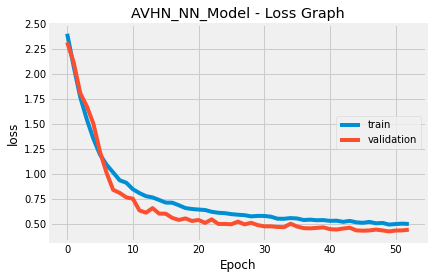

In [158]:
graph(avhn_model_hnn, 'loss', 'val_loss', 'AVHN_NN_Model - Loss Graph', 'loss')

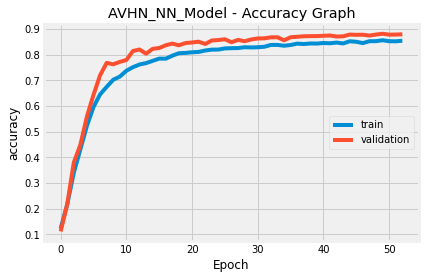

In [159]:
graph(avhn_model_hnn, 'accuracy', 'val_accuracy', 'AVHN_NN_Model - Accuracy Graph', 'accuracy')

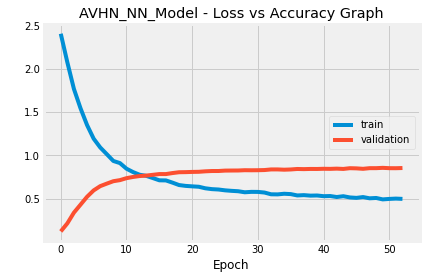

In [160]:
graph(avhn_model_hnn, 'loss', 'accuracy', 'AVHN_NN_Model - Loss vs Accuracy Graph', ' ')

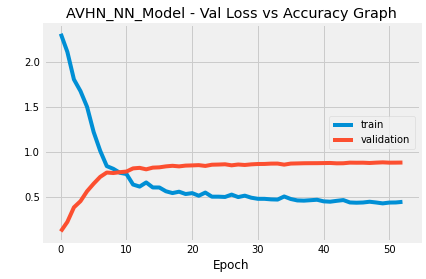

In [161]:
graph(avhn_model_hnn, 'val_loss', 'val_accuracy', 'AVHN_NN_Model - Val Loss vs Accuracy Graph', ' ')

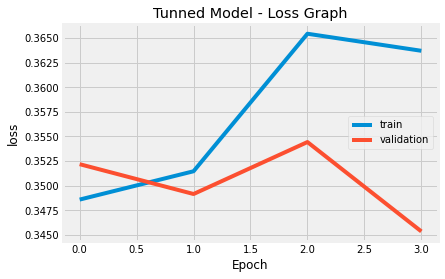

In [162]:
graph(tunned_model_run, 'loss', 'val_loss', 'Tunned Model - Loss Graph', 'loss')

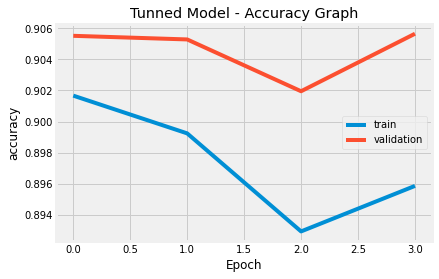

In [163]:
graph(tunned_model_run, 'accuracy', 'val_accuracy', 'Tunned Model - Accuracy Graph', 'accuracy')

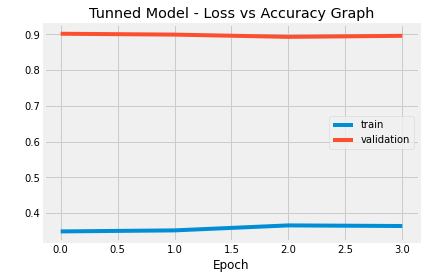

In [164]:
graph(tunned_model_run, 'loss', 'accuracy', 'Tunned Model - Loss vs Accuracy Graph', ' ')

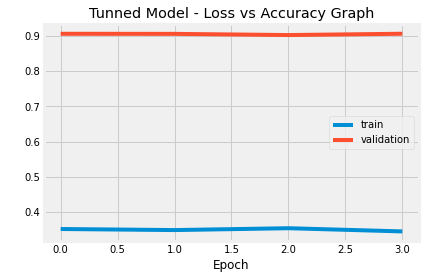

In [165]:
graph(tunned_model_run, 'val_loss', 'val_accuracy', 'Tunned Model - Loss vs Accuracy Graph', ' ')

Conclusion

Dataset contains image data along with the labels that we need to classify. Dataset are balanced and there are 10 labels. We created 2 model the base model with less layers, who had some good accuracy and less loss the model with more layers are parameters were performing more efficiently and we can see some consistency on the same Post tunning we can see it takes only 3 epoch to achieve more accuracy and less loss.